<a href="https://colab.research.google.com/github/ChoeTaeBin/deep_learning_study/blob/master/DNN_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import matplotlib.pyplot as plt
from sklearn import datasets

데이터 가져오기

In [38]:
digits_data = datasets.load_digits()

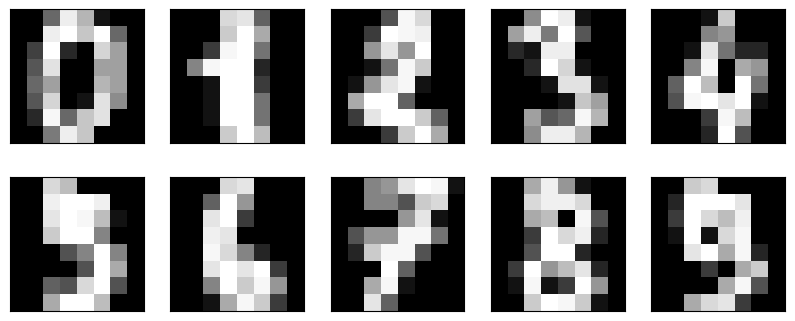

data shape:  (1797, 64)
label:  [0 1 2 3 4 5 6 7 8 9]


In [39]:
n_img = 10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax = plt.subplot(2, 5, i+1)
  ax.imshow(digits_data.data[i].reshape(8,8), cmap = "Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

print("data shape: ", digits_data.data.shape)
print("label: ", digits_data.target[ : n_img])

테스트 세트 분할

In [40]:
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target

X_train, X_test, y_train, y_test = train_test_split(digit_images, labels)

#Tensor로 변환
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

모델 구축

In [41]:
from torch import nn

model = nn.Sequential(
    nn.Linear(64, 32), #input이 64개 이므로
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10) #class가 10개이므로
)
print(model)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


optimizer, loss fuction 생성

In [42]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)
loss_func = nn.CrossEntropyLoss() #자동으로 softmax를 통과시켜주고 타깃도 원핫 벡터로 만들어 준다.

학습

In [43]:
num_epochs = 1000 #에포크 수 (모든 훈련데이터를 전부 사용하는 것이 1 에포크임)

record_loss_train = []
record_loss_test = []


for i in range(num_epochs):
  optimizer.zero_grad() #순전파 전에 local gradient를 0으로 초기화

  #예측(순전파)
  y_pred_train = model(X_train)
  y_pred_test = model(X_test)

  #손실 구하기
  loss_train = loss_func(y_pred_train, y_train)
  loss_test = loss_func(y_pred_test, y_test)

  #back propagation
  loss_train.backward()

  #파라미터 갱신
  optimizer.step()

  #기록
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  #중간 보고
  if i%100 == 0:
    print(f"Epoch:{i}\tLoss_Train:{loss_train.item()}\tLoss_Test:{loss_test.item()}" )




Epoch:0	Loss_Train:2.951768398284912	Loss_Test:2.9778101444244385
Epoch:100	Loss_Train:0.7060527205467224	Loss_Test:0.7830742001533508
Epoch:200	Loss_Train:0.34593290090560913	Loss_Test:0.41062313318252563
Epoch:300	Loss_Train:0.23009321093559265	Loss_Test:0.29128286242485046
Epoch:400	Loss_Train:0.17364324629306793	Loss_Test:0.2358708679676056
Epoch:500	Loss_Train:0.1405244767665863	Loss_Test:0.20333854854106903
Epoch:600	Loss_Train:0.11862889677286148	Loss_Test:0.18250085413455963
Epoch:700	Loss_Train:0.10289817303419113	Loss_Test:0.16769874095916748
Epoch:800	Loss_Train:0.09060001373291016	Loss_Test:0.1563740074634552
Epoch:900	Loss_Train:0.08050302416086197	Loss_Test:0.1471099704504013


오차 추이 관찰

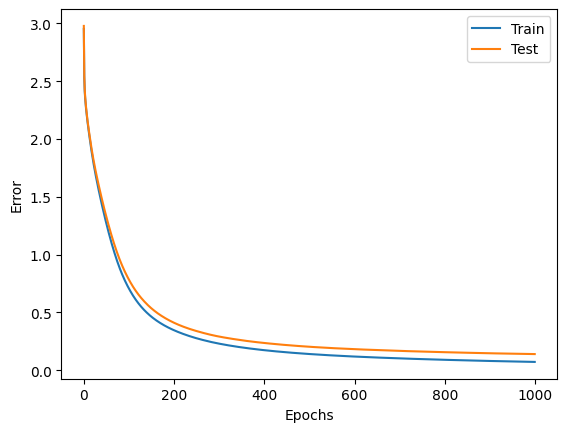

In [44]:
plt.plot(range(len(record_loss_train)), record_loss_train, label = "Train")
plt.plot(range(len(record_loss_test)),record_loss_test, label = "Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

accuracy 계산

In [45]:
y_pred_test = model(X_test)
count = (y_pred_test.argmax(axis = 1) == y_test).sum().item()
print(f"정답률:{(count/len(y_test))*100}%")

정답률:96.22222222222221%


예측해보기

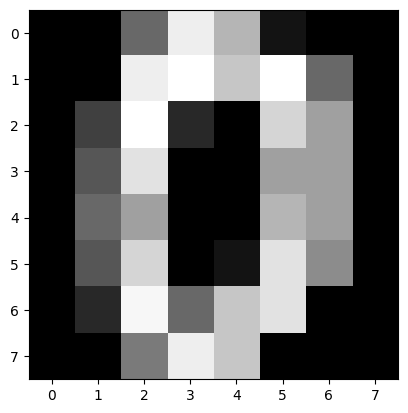

정답:0 예측결과:0


In [46]:
img_id = 0
a_img = digit_images[img_id]
plt.imshow(a_img.reshape(8, 8), cmap = "Greys_r")
plt.show()

a_img = torch.tensor(a_img, dtype = torch.float32)
pred = model(a_img)
print(f"정답:{labels[img_id]} 예측결과:{pred.argmax().item()}")
